# High order positivity preserving methods

 1. Chapter 5: ADER and DeC
    1. [Section 1.1: Modified Patankar schemes](#mP)
    1. [Section 1.2: Strong Stability Preserving RK](#SSPRK)

In [ ]:
# If you do not have numpy, matplotlib, scipy or nodepy, run this cell
!pip install numpy
# This is the basic package in python with all the numerical functions

!pip install scipy
# This package has some functions to deal with polynomials

!pip install matplotlib
# This package allows to  plot

!pip install nodepy
# This package has some interesting features for RK methods

In [3]:
# We need a couple of packages in this chapter
import numpy as np  
# This is the basic package in python with all the numerical functions

import matplotlib.pyplot as plt 
# This package allows to  plot

from nodepy import rk
#This package already implemented some functions for Runge Kutta and multistep methods

In [4]:
import numpy as np

## Linear scalar Dahlquist's equation
def linear_scalar_flux(u,t=0,k_coef=10):
    ff=np.zeros(np.shape(u))
    ff[0]= -k_coef*u[0]
    return ff

def linear_scalar_exact_solution(u0,t,k_coef=10):
    return np.array([np.exp(-k_coef*u0[0]*t)])


def linear_scalar_jacobian(u,t=0,k_coef=10):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-k_coef
    return Jf

#nonlinear problem y'=-ky|y| +1  
def nonlinear_scalar_flux(u,t=0,k_coef=10):
    ff=np.zeros(np.shape(u))
    ff[0]=-k_coef*abs(u[0])*u[0] +1
    return ff


def nonlinear_scalar_exact_solution(u0,t,k_coef = 10):
        sqrtk = np.sqrt(k_coef)
        ustar = 1 / sqrtk
        if u0[0] >= ustar:
            uex=np.array([1./np.tanh(sqrtk * t + np.arctanh(1/sqrtk /u0[0])) / sqrtk])
        elif u0[0] < 0 and t < - np.atan(sqrtk * u0[0]) / sqrtk:
            uex=np.array([np.tan(sqrtk * t + np.arctan(sqrtk * u0[0])) / sqrtk])
        else:
            uex=np.array([np.tanh(sqrtk * t + np.arctanh(sqrtk * u0[0])) / sqrtk])
        return uex

def nonlinear_scalar_jacobian(u,t=0,k_coef=10):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-k_coef*abs(u[0])
    return Jf


# SYSTEMS


# linear systems
def linear_system2_flux(u,t=0):
    d=np.zeros(len(u))
    d[0]= -5*u[0] + u[1]
    d[1]= 5*u[0] -u[1]
    return d


def linear_system2_exact_solution(u0,t):
    A=np.array([[-5,1],[5,-1]])
    u_e=u0+(1-np.exp(-6*t))/6*np.dot(A,u0)
    return u_e

def linear_system2_jacobian(u,t=0):
    Jf=np.array([[-5,1],[5,-1]])
    return Jf

linear_system2_matrix = np.array([[-5,1],[5,-1]])

def linear_system2_production_destruction(u,t=0):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[0,1]=u[1]
    d[1,0]=u[1]
    p[1,0]=5*u[0]
    d[0,1]=5*u[0]
    return p,d

#lin system 3 x3

def linear_system3_flux(u,t=0):
    d=np.zeros(len(u))
    d[0]= -u[0] + 3*u[1]
    d[1]= -3*u[1] + 5*u[2]
    d[2]= -5*u[2] 
    return d


def linear_system3_exact_solution(u0,t=0):
    u_e = np.zeros(len(u0))
    u_e[0] = 15.0/8.0*u0[2]*(np.exp(-5*t) - 2*np.exp(-3*t)+np.exp(-t))
    u_e[1] = 5.0/2.0*u0[2]*(-np.exp(-5*t) + np.exp(-3*t))
    u_e[2] = u0[2]*np.exp(-5*t)
    return u_e
def linear_system3_jacobian(u,t=0):
    Jf=np.zeros((len(u),len(u)))
    Jf[0,0]=-1.
    Jf[0,1]=3
    Jf[1,1] = -3
    Jf[1,2] = 5
    Jf[2,2] = -5 
    return Jf


## Nonlinear 3x3 system production destruction
def nonlinear_system3_flux(u,t=0):
    ff=np.zeros(len(u))
    ff[0]= -u[0]*u[1]/(u[0]+1)
    ff[1]= u[0]*u[1]/(u[0]+1) -0.3*u[1]
    ff[2]= 0.3*u[1]
    return ff

def nonlinear_system3_production_destruction(u,t=0):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[1,0]=u[0]*u[1]/(u[0]+1)
    d[0,1]=p[1,0]
    p[2,1]=0.3*u[1]
    d[1,2]=p[2,1]
    return p,d


# SIR Model
def SIR_flux(u,t=0,beta=3,gamma=1):
    ff=np.zeros(len(u))
    N=np.sum(u)
    ff[0]=-beta*u[0]*u[1]/N
    ff[1]=+beta*u[0]*u[1]/N - gamma*u[1]
    ff[2]= gamma*u[1]
    return ff

def SIR_jacobian(u,t=0,beta=3,gamma=1):
    Jf=np.zeros((len(u),len(u)))
    N=np.sum(u)
    Jf[0,0]=-beta*u[1]/N
    Jf[0,1]=-beta*u[0]/N
    Jf[1,0]= beta*u[1]/N
    Jf[1,1]= beta*u[0]/N - gamma
    Jf[2,1] = gamma 
    return Jf

def SIR_production_destruction(u,t=0,beta=3,gamma=1):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    N=np.sum(u)
    p[1,0]=beta*u[0]*u[1]/N
    d[0,1]=p[1,0]
    p[2,1]=gamma*u[1]
    d[1,2]=p[2,1]
    return p,d

# Nonlinear_oscillator
def nonLinearOscillator_flux(u,t=0,alpha=0.):
    ff=np.zeros(np.shape(u))
    n=np.sqrt(np.dot(u,u))
    ff[0]=-u[1]/n-alpha*u[0]/n
    ff[1]=u[0]/n - alpha*u[1]/n
    return ff

def nonLinearOscillator_exact_solution(u0,t):
    u_ex=np.zeros(np.shape(u0))
    n=np.sqrt(np.dot(u0,u0))
    u_ex[0]=np.cos(t/n)*u0[0]-np.sin(t/n)*u0[1]
    u_ex[1]=np.sin(t/n)*u0[0]+np.cos(t/n)*u0[1]
    return u_ex


# Non linear oscillator damped
def nonLinearOscillatorDamped_flux(u,t,alpha=0.01):
    ff=np.zeros(np.shape(u))
    n=np.sqrt(np.dot(u,u))
    ff[0]=-u[1]/n-alpha*u[0]/n
    ff[1]=u[0]/n - alpha*u[1]/n
    return ff

def nonLinearOscillatorDamped_exact_solution(u0,t,alpha=0.01):
    u_ex=np.zeros(np.shape(u0))
    n0=np.sqrt(np.dot(u0,u0))
    n=n0*np.exp(-alpha*t)
    u_ex[0]=n/n0*(np.cos(t/n)*u0[0]-np.sin(t/n)*u0[1])
    u_ex[1]=n/n0*(np.sin(t/n)*u0[0]+np.cos(t/n)*u0[1])
    return u_ex


# pendulum
def pendulum_flux(u,t=0):
    ff=np.zeros(np.shape(u))
    ff[0]=u[1]
    ff[1]=-np.sin(u[0])
    return ff

def pendulum_jacobian(u,t=0):
    Jf=np.zeros((2,2))
    Jf[0,1]=1.
    Jf[1,0]=np.cos(u[0])
    return Jf

def pendulum_entropy(u,t=0):
    return np.array(0.5*u[1]**2.-np.cos(u[0]), dtype=np.float)

def pendulum_entropy_variables(u,t=0):
    v=np.zeros(np.shape(u))
    v[0]=np.sin(u[0])
    v[1]=u[1]
    return v

# Robertson
def Robertson_flux(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    ff=np.zeros(np.shape(u))
    ff[0] = alpha*u[1]*u[2]-beta*u[0]
    ff[1] = beta*u[0]-alpha*u[1]*u[2] - gamma*u[1]**2
    ff[2] = gamma*u[1]**2
    return ff

def Robertson_jacobian(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    Jf=np.zeros((3,3))
    Jf[0,0]= -beta 
    Jf[0,1]= alpha*u[2]
    Jf[0,2]= alpha*u[1]
    Jf[1,0]= beta
    Jf[1,1]= -alpha*u[2]-2*gamma*u[1]
    Jf[1,2]= -alpha*u[1]
    Jf[2,1] = 2*gamma*u[1] 
    return Jf

def Robertson_production_destruction(u,t=0,alpha=10**4,beta=0.04, gamma=3*10**7):
    p=np.zeros((len(u),len(u)))
    d=np.zeros((len(u),len(u)))
    p[0,1]=alpha*u[1]*u[2]
    d[1,0]=p[0,1]
    p[1,0]=beta*u[0]
    d[0,1]=p[1,0]
    p[2,1]=gamma*u[1]**2
    d[1,2]=p[2,1]
    return p,d

def Robertson_rhs(u,t=0):
    return np.zeros(3)

  
# Lotka:
def lotka_flux(u,t=0,alpha=1,beta=0.2,delta=0.5,gamma=0.2):
    ff=np.zeros(np.shape(u))
    ff[0]=alpha*u[0]-beta*u[0]*u[1]
    ff[1]=delta*beta*u[0]*u[1]-gamma*u[1]
    return ff

def lotka_jacobian(u,t=0,alpha=1,beta=0.2,delta=0.5,gamma=0.2):
    Jf=np.zeros((2,2))
    Jf[0,0] = alpha -beta*u[1]
    Jf[0,1] = -beta*u[0]
    Jf[1,0] = delta*beta*u[1]
    Jf[1,1] = delta*beta*u[0] -gamma
    return Jf


#3 bodies problem in 2D: U=(x_1,x_2,v_1,v_2,y_1,y_2,w_1,w_2,z_1,z_2,s_1,s_2)
# where x is the 2D position of body1 and v is speed body1 sun
# y, w are position and velocity body2 earth
# z, s are position and velocity body3 mars

def threeBodies_flux(u,t=0):
    m1=1.98892*10**30
    m2=5.9722*10**24
    m3=6.4185*10**23
    G=6.67*10**(-11)
    f=np.zeros(np.shape(u))
    x=u[0:2]
    v=u[2:4]
    y=u[4:6]
    w=u[6:8]
    z=u[8:10]
    s=u[10:12]
    dxy3=np.linalg.norm(x-y)**3
    dxz3=np.linalg.norm(x-z)**3
    dyz3=np.linalg.norm(y-z)**3
    f[0:2]=v
    f[2:4]=-m2*G/dxy3*(x-y)-m3*G/dxz3*(x-z)
    f[4:6]=w
    f[6:8]=-m1*G/dxy3*(y-x)-m3*G/dyz3*(y-z)
    f[8:10]=s
    f[10:12]=-m1*G/dxz3*(z-x)-m2*G/dyz3*(z-y)
    return f


class ODEproblem:
    def __init__(self,name):
        self.name=name
        if self.name=="linear_scalar":
            self.u0 = np.array([1.])
            self.T_fin= 2.
            self.k_coef=10
            self.matrix=np.array([-self.k_coef])
        elif self.name=="nonlinear_scalar":
            self.k_coef=10
            self.u0 = np.array([1.1/np.sqrt(self.k_coef)])
            self.T_fin= 1.
        elif self.name=="linear_system2":
            self.u0 = np.array([0.9,0.1])
            self.T_fin= 1.
            self.matrix = np.array([[-5,1],[5,-1]])
        elif self.name=="linear_system3":
            self.u0 = np.array([0,0.,10.])
            self.T_fin= 10.
        elif self.name=="nonlinear_system3":
            self.u0 = np.array([9.98,0.01,0.01])
            self.T_fin= 30.
        elif self.name=="SIR":
            self.u0 = np.array([1000.,1,10**-20])
            self.T_fin= 10.
        elif self.name=="nonLinearOscillator":
            self.u0 = np.array([1.,0.])
            self.T_fin= 50
        elif self.name=="nonLinearOscillatorDamped":
            self.u0 = np.array([1.,0.])
            self.T_fin= 50
        elif self.name=="Robertson":
            self.u0 = np.array([1.,10**-20,10**-20])
            self.T_fin= 10.**10.
        elif self.name=="lotka":
            self.u0 = np.array([1.,2.])
            self.T_fin= 100.
        elif self.name=="threeBodies":
            self.u0 = np.array([0,0,0,0,149*10**9,0,0,30*10**3,-226*10**9,0,0,-24.0*10**3])
            self.T_fin= 10.**8.
        else:
            raise ValueError("Problem not defined")

    def flux(self,u,t=0):
        if self.name=="linear_scalar":
            return linear_scalar_flux(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_flux(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_flux(u,t)
        elif self.name=="linear_system3":
            return linear_system3_flux(u,t)
        elif self.name=="nonlinear_system3":
            return nonlinear_system3_flux(u,t)
        elif self.name=="SIR":
            return SIR_flux(u,t)
        elif self.name=="nonLinearOscillator":
            return nonLinearOscillator_flux(u,t)
        elif self.name=="nonLinearOscillatorDamped":
            return nonLinearOscillatorDamped_flux(u,t)
        elif self.name=="Robertson":
            return Robertson_flux(u,t)
        elif self.name=="lotka":
            return lotka_flux(u,t)
        elif self.name=="threeBodies":
            return threeBodies_flux(u,t)
        else:
            raise ValueError("Flux not defined for this problem")
        
    def jacobian(self,u,t=0):
        if self.name=="linear_scalar":
            return linear_scalar_jacobian(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_jacobian(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_jacobian(u,t)
        elif self.name=="linear_system3":
            return linear_system3_jacobian(u,t)
        elif self.name=="SIR":
            return SIR_jacobian(u,t)
        elif self.name=="Robertson":
            return Robertson_jacobian(u,t)
        elif self.name=="lotka":
            return lotka_jacobian(u,t)
        else:
            raise ValueError("Jacobian not defined for this problem")

    def exact(self,u,t):
        if self.name=="linear_scalar":
            return linear_scalar_exact_solution(u,t,self.k_coef)
        elif self.name=="nonlinear_scalar":
            return nonlinear_scalar_exact_solution(u,t,self.k_coef)
        elif self.name=="linear_system2":
            return linear_system2_exact_solution(u,t)
        elif self.name=="linear_system3":
            return linear_system3_exact_solution(u,t)
        elif self.name=="nonLinearOscillator":
            return nonLinearOscillator_exact_solution(u,t)
        elif self.name=="nonLinearOscillatorDamped":
            return nonLinearOscillatorDamped_exact_solution(u,t)
        else:
            raise ValueError("Exact solution not defined for this problem")
            
    def exact_solution_times(self,u0,tt):
        exact_solution=np.zeros((len(u0),len(tt)))
        for it, t in enumerate(tt):
            exact_solution[:,it]=self.exact(u0,t)
        return exact_solution

    def prod_dest(self,u,t=0):
        if self.name=="linear_system2":
            return linear_system2_production_destruction(u,t)
        if self.name=="nonlinear_system3":
            return nonlinear_system3_production_destruction(u,t)
        elif self.name=="Robertson":
            return Robertson_production_destruction(u,t)
        elif self.name=="SIR":
            return SIR_production_destruction(u,t)
        else:
            raise ValueError("Prod Dest not defined for this problem")

        

## Modified Patankar scheme for production-destruction systems <a id='mP'></a>

Consider production-destruction systems (PDS) 

\begin{equation}
\begin{cases}
d_t c_i = P_i(c ) - D_i(c ) , \quad  i=1,\dots,I,\quad & P_i(c) = \sum_{j=1}^I p_{i,j}(c),\\
c(t=0)=c_0,& D_i(c) = \sum_{j=1}^I d_{i,j}(c),
\end{cases}
\end{equation}

where

$$p_{i,j}(c) , d_{i,j} (c) \geq 0, \qquad \forall i,j \in I, \quad \forall c \in \mathbb R^{+,I}.$$

Applications: Chemical reactions, biological systems, population evolutions and PDEs.

Problems: linear_system2, nonlinear_system3, Robertson, SIR.

Example: SIR
		
\begin{equation*}
\begin{cases}
d_tS = - \beta \frac{SI}{N}\\
d_t I = \beta \frac{SI}{N} -\gamma I\\
d_t R = \gamma I
\end{cases}
\end{equation*}

Property 1: Conservation
	\begin{align*}
		&\sum_{i=1}^I c_i(0) = \sum_{i=1}^I c_i(t), \quad \forall t\geq 0 \\
		\Longleftrightarrow \quad &p_{i,j}(c)=d_{j,i} (c) , \qquad \forall i,j \in I, \quad \forall c \in \mathbb R^{+,I}. \end{align*}


Property 2: Positivity 

\begin{align*}
&\text{If }P_i,D_i\text{ Lipschitz, and if when } c_i\to 0 \Rightarrow D_i(c)\to 0 \Longrightarrow \\
&c_i(0) > 0 \,   \forall i \in I \Longrightarrow c_i(t)>0 \,\forall i \in I\; \forall t >0.
\end{align*}

Goal: 
* One step method
* Unconditionally positive
* Unconditionally conservative
* High order accurate


**Explicit Euler**
* $c^{n+1}= c^n +\Delta t \left( P(c^n) - D(c^n) \right)$
* **Conservative** 
* First order
* Not unconditionally positive, if $\Delta t$ is too big...

Consider a conservative and positive PDS where we assume that 
the right hand side is not identical zero. Then, there exists 
a $c^n\geq0$ such that ${P}(c^n)-{D}(c^n)\neq0$. Since the PDS is conservative,
we can at least
find one constituent $i\in \lbrace  1,\dots, I \rbrace$, where $D_i(c^n)>P_i(c^n)\geq0$. Choosing
\begin{equation}
\Delta t >\frac{c_i^n}{D_i(c^n)-P_i(c^n)} > 0,
\end{equation}
we obtain 
\begin{equation}
 c_i^{n+1}=c_i^{n} +\Delta t\left(P_i(c^n)-D_i(c^n)\right)<c_i^{n} +\frac{c_i^n}{D_i(c^n)-P_i(c^n)} \left(P_i(c^n)-D_i(c^n)\right)
 =c_i^{n}-c_i^{n}=0.
\end{equation}
This demonstrates the violation of the positivity for the explicit Euler method for unbounded timesteps $\Delta t$. 

**Patankar's scheme** [Patankar's book 1980](https://books.google.it/books/about/Numerical_Heat_Transfer_and_Fluid_Flow.html?id=N2MVAQAAIAAJ&redir_esc=y)
* Unconditionally positive
* Weighting the destruction term in the original explicit Euler method

$$
c_i^{n+1}=c_i^n+\Delta t  \left( \sum_{j=1}^I p_{i,j}(c^n) - 
\sum_{j=1}^I d_{i,j}(c^n) \frac{c^{n+1}_i}{c_i^n} \right), \quad i=1,\dots, I,\\
\Longleftrightarrow \left(1 +\Delta t \sum_{j=1}^I  \frac{d_{i,j}(c^n)}{c_i^n} \right) c_i^{n+1}=c_i^n+\Delta t  \left( \sum_{j=1}^I p_{i,j}(c^n) \right), \quad i=1,\dots, I,
$$

* conservation relation  is violated. 

In [30]:
## Modified Patankar 1st order scheme

def patankar(prod_dest, tspan, u0):
    '''
    Input: prod_dest is the function that returns the matrices p_{i,j}(c) and d_{i,j}(c)
    tspan is the time vector
    u0 is the initial condition
    ''' 
    dim=len(u0)            # Dimension of the problem
    Nt=len(tspan)          # Length of time span
    U=np.zeros((dim,Nt))   # Solution vector
    p=np.zeros((dim,dim))  # Temporary production matrix
    d=np.zeros((dim,dim))  # Temporary destruction matrix
    U[:,0]=u0
    for it in range(1,Nt):   # Loop over timesteps
        dt=tspan[it]-tspan[it-1]    
        p,d =prod_dest(U[:,it-1])   # Computing the production and destruction at the previous timestep
        for i in range(dim):        # Adding all the terms
            lhs = 1.           # Initializing the lhs coefficients
            rhs = U[i,it-1]           # Initializing the rhs
            for j in range(dim):
                lhs = lhs + dt*d[i,j]/U[i,it-1]
                rhs = rhs + dt*p[i,j]
            U[i,it] = rhs/lhs    # Solve the final system
    return tspan, U

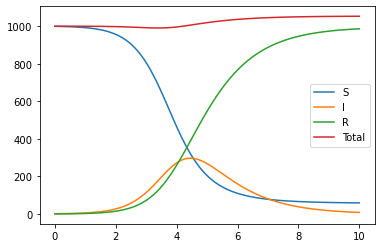

In [35]:
pr=ODEproblem("SIR")
tt=np.linspace(0,pr.T_fin, 100)
tt,UU=patankar(pr.prod_dest,tt,pr.u0)
plt.plot(tt,UU[0,:], label="S")
plt.plot(tt,UU[1,:], label="I")
plt.plot(tt,UU[2,:], label="R")
plt.plot(tt,np.sum(UU,0), label="Total")
plt.legend()

**Modified Patankar Scheme** [H Burchard, E Deleersnijder, A Meister 2003](https://www.researchgate.net/profile/Andreas-Meister-2/publication/225796292_Application_of_modified_Patankar_schemes_to_stiff_biogeochemical_models_for_the_water_column/links/5538e85a0cf247b8587d7efb/Application-of-modified-Patankar-schemes-to-stiff-biogeochemical-models-for-the-water-column.pdf)
* Modification of Patankar scheme
* Unconditionally positive
* Conservative
* Linearly implicit (with a mass inversion)

\begin{equation}
c_i^{n+1}:=c_i^n+\Delta t  \left( \sum_{j=1}^I p_{i,j}(c^n) \frac{c^{n+1}_j}{c_j^n} - \sum_{j=1}^I d_{i,j}(c^n) \frac{c^{n+1}_i}{c_i^n} \right), \quad i=1,\dots, I.
\end{equation}

The scheme is implicit and can be solved inverting 
the mass matrix $M$ in the system $Mc^{n+1}=c^n$ where $M$ is

\begin{equation}
M_{i,j}(c^n) = 
\begin{cases} 
1+\Delta t \sum_{l=1}^I \frac{d_{i,l}(c^n)}{c_i^n} ,  \quad & \text{if } i=j,\\
- \Delta t \frac{p_{i,j}(c^n)}{c_j^n} , \quad & \text{if } i\neq j.
\end{cases}
\end{equation}

The mass matrix
* has positive values on the diagonal
* has negative values on the off-diagonal
* is strictly diagonally dominant by columns 
* the inverse is positive

#### Jacobi's iterative method
Let $M$ be a strictly diagonally dominant (by columns) matrix, with $M=D-L$ with $D>0$ diagonal matrix and $L>0$ matrix with 0 entries on the diagonal. Then, $M$ is invertible and $M^{-1}$ is positive.
##### Proof
Suppose we want to solve 

$$
Mx=b
$$

for $b\geq 0$ a nonnegative vector. Proving that $M^{-1}$ is positive is equivalent to prove that $x$ is nonnegative for any $b\geq 0$.

To get to Jacobi's iteration let us rewrite the system as

$$
Dx=Lx+b \Longleftrightarrow x=D^{-1}(Lx+b)
$$

If $x$ is a solution of the orginal system, it is a solution of the previous one.

How to get to the solution $x$? Iterations

$$
x^{(k)}=D^{-1}(Lx^{(k-1)}+b).
$$

* Do the iterations converge?

$$
e^{(k)}:=x^{(k)}-x \\
e^{(k)}=x^{(k)}-x= D^{-1}(Lx^{(k-1)}+b)-D^{-1}(Lx+b) = D^{-1}L e^{(k-1)}.
$$

Now, the $\infty$-norm of $D^{-1}L$ is smaller than 1, because

$$
||D^{-1}L||_\infty = \max_i \sum_{j} \frac{|L_{ji}|}{|D_{ii}|}=\max_i  \frac{\sum_{j} L_{ji}}{D_{ii}} < 1.
$$

Hence,

$$
||e^{(k)}||_\infty \leq ||D^{-1}L||_\infty||e^{(k-1)}||_\infty < ||e^{(k-1)}||_\infty.
$$

* Is the solution $x$ positive?
Suppose we start from a positive guess $x^{(0)}$, then, by induction,

$$ 
x^{(k)}=\underbrace{D^{-1}L}_{\geq 0} \underbrace{x^{(k-1)}}_{\geq 0}+\underbrace{D^{-1}b}_{\geq 0}.
$$

So,

$$x=\lim_{k\to \infty} x^{(k)} \geq 0.$$

In [28]:
## Modified Patankar 1st order scheme

def mPEuler(prod_dest, tspan, u0):
    '''
    Input: prod_dest is the function that returns the matrices p_{i,j}(c) and d_{i,j}(c)
    tspan is the time vector
    u0 is the initial condition
    ''' 
    dim=len(u0)            # Dimension of the problem
    Nt=len(tspan)          # Length of time span
    U=np.zeros((dim,Nt))   # Solution vector
    p=np.zeros((dim,dim))  # Temporary production matrix
    d=np.zeros((dim,dim))  # Temporary destruction matrix
    U[:,0]=u0
    for it in range(1,Nt):   # Loop over timesteps
        dt=tspan[it]-tspan[it-1]    
        p,d =prod_dest(U[:,it-1])   # Computing the production and destruction at the previous timestep
        MM = np.eye(dim)            # Initializing the mass matrix
        for i in range(dim):        # Adding all the terms
            for j in range(dim):
                MM[i,j] = MM[i,j] - dt*p[i,j]/U[j,it-1]
                MM[i,i] = MM[i,i] + dt*d[i,j]/U[i,it-1]
        U[:,it] = np.linalg.solve(MM,U[:,it-1])   # Solve the final system
    return tspan, U

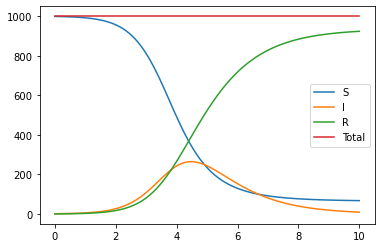

In [36]:
pr=ODEproblem("SIR")
tt=np.linspace(0,pr.T_fin, 100)
tt,UU=mPEuler(pr.prod_dest,tt,pr.u0)
plt.plot(tt,UU[0,:], label="S")
plt.plot(tt,UU[1,:], label="I")
plt.plot(tt,UU[2,:], label="R")
plt.plot(tt,np.sum(UU,0), label="Total")
plt.legend()

**High Order modified Patankar Runge--Kutta Methods**
* One mPRK22 [H Burchard, E Deleersnijder, A Meister 2003](https://www.researchgate.net/profile/Andreas-Meister-2/publication/225796292_Application_of_modified_Patankar_schemes_to_stiff_biogeochemical_models_for_the_water_column/links/5538e85a0cf247b8587d7efb/Application-of-modified-Patankar-schemes-to-stiff-biogeochemical-models-for-the-water-column.pdf)
* [S. Kopecz and A. Meister 2018](https://arxiv.org/abs/1702.04589) [2019](https://arxiv.org/abs/1703.05052) Categorization of families of mPRK22$(\alpha)$ and mPRK43$(\alpha,\beta)$
* [J. Huang, C-W. Shu 2018](https://www.brown.edu/research/projects/scientific-computing/sites/brown.edu.research.projects.scientific-computing/files/uploads/Positivity-preserving%20time%20discretizations.pdf) mPRK22$(\alpha, \beta)$
* [J. Huang, W. Zhao, C-W. Shu 2019](https://doi.org/10.1007/s10915-018-0881-9) Third order RK43
* [P. Öffner, D. Torlo 2020](https://arxiv.org/abs/1905.09237) Arbitrarily high order mPDeC

**Remark**: It has been proven that there are not modified Patankar RK schemes of order 3 with 3 stages.

### Modified Patankar Deferred Correction schemes


Blackboard, slides and [article](https://arxiv.org/abs/1905.09237)!

Final formulation:
at each correction $(k)$ at each subtimestep $m$ 

\begin{equation}
\begin{split}
&\mathcal L^{1,m}_i (\mathbf{c}^{(k)})-\mathcal L^{1,m}_i (\mathbf{c}^{(k-1)})+\mathcal L^{2,m}_i (\mathbf{c}^{(k)},\mathbf{c}^{(k-1)})=0\\
&c_i^{m,(k)}-c^0_i -\Delta t   \sum_{r=0}^M \theta_r^m \sum_{j=1}^I 
\left( p_{i,j}(c^{r,(k-1)}) 
\frac{c^{m,(k)}_{\gamma(j,i, \theta_r^m)}}{c_{\gamma(j,i, \theta_r^m)}^{m,(k-1)}}
- d_{i,j}(c^{r,(k-1)})  \frac{c^{m,(k)}_{\gamma(i,j, \theta_r^m)}}{c_{\gamma(i,j, \theta_r^m)}^{m,(k-1)}} \right)=0.
\end{split}
\end{equation}

with 
$$
\gamma(i,j,\theta^m_r):=\begin{cases}
i& \text{if } \theta_r^m\geq 0\\ 
j& \text{if } \theta_r^m<0
\end{cases}
$$

**CODE!**

In [38]:
## Reminder: DeC code

from scipy.interpolate import lagrange
from numpy.polynomial.legendre import leggauss

def equispaced(order):
    '''
    Takes input d and returns the vector of d equispaced points in [-1,1]
    And the integral of the basis functions interpolated in those points
    '''
    nodes= np.linspace(-1,1,order)
    w= np.zeros(order)
    for k in range(order):
        yy= np.zeros(order)
        yy[k]=1.
        zz=lagrange(nodes,yy)
        pp=zz.integ()
        w[k]=pp(1)-pp(-1)

    return nodes, w

def lglnodes(n,eps=10**-15):
    '''
    Python translation of lglnodes.m

    Computes the Legendre-Gauss-Lobatto nodes, weights and the LGL Vandermonde 
    matrix. The LGL nodes are the zeros of (1-x^2)*P'_N(x). Useful for numerical
    integration and spectral methods. 

    Parameters
    ----------
    n : integer, requesting an nth-order Gauss-quadrature rule on [-1, 1]

    Returns
    -------
    (nodes, weights) : tuple, representing the quadrature nodes and weights.
                       Note: (n+1) nodes and weights are returned.
            

    Example
    -------
    >>> from lglnodes import *
    >>> (nodes, weights) = lglnodes(3)
    >>> print(str(nodes) + "   " + str(weights))
    [-1.        -0.4472136  0.4472136  1.       ]   [0.16666667 0.83333333 0.83333333 0.16666667]

    Notes
    -----

    Reference on LGL nodes and weights:  
      C. Canuto, M. Y. Hussaini, A. Quarteroni, T. A. Tang, "Spectral Methods
      in Fluid Dynamics," Section 2.3. Springer-Verlag 1987

    Written by Greg von Winckel - 04/17/2004
        Contact: gregvw@chtm.unm.edu

    Translated and modified into Python by Jacob Schroder - 9/15/2018 
    '''

    w = np.zeros((n+1,))
    x = np.zeros((n+1,))
    xold = np.zeros((n+1,))

    # The Legendre Vandermonde Matrix
    P = np.zeros((n+1,n+1))

    epss = eps

    # Use the Chebyshev-Gauss-Lobatto nodes as the first guess
    for i in range(n+1): 
        x[i] = -np.cos(np.pi*i / n)
  
  
    # Compute P using the recursion relation
    # Compute its first and second derivatives and 
    # update x using the Newton-Raphson method.
    
    xold = 2.0
    
    for i in range(100):
        xold = x
       
        P[:,0] = 1.0 
        P[:,1] = x
       
        for k in range(2,n+1):
            P[:,k] = ( (2*k-1)*x*P[:,k-1] - (k-1)*P[:,k-2] ) / k
       
        x = xold - ( x*P[:,n] - P[:,n-1] )/( (n+1)*P[:,n]) 
        
        if (max(abs(x - xold).flatten()) < epss ):
            break 
    
    w = 2.0 / ( (n*(n+1))*(P[:,n]**2))
    
    return x, w
 
def lagrange_basis(nodes,x,k):
    y=np.zeros(x.size)
    for ix, xi in enumerate(x):
        tmp=[(xi-nodes[j])/(nodes[k]-nodes[j])  for j in range(len(nodes)) if j!=k]
        y[ix]=np.prod(tmp)
    return y

def get_nodes(order,nodes_type):
    if nodes_type=="equispaced":
        nodes,w = equispaced(order)
    elif nodes_type == "gaussLegendre":
        nodes,w = leggauss(order)
    elif nodes_type == "gaussLobatto":
        nodes, w = lglnodes(order-1,10**-15)
    nodes=nodes*0.5+0.5
    w = w*0.5
    return nodes, w
        
def compute_theta_DeC(order, nodes_type):
    nodes, w = get_nodes(order,nodes_type)
    int_nodes, int_w = get_nodes(order,"gaussLobatto")
    # generate theta coefficients 
    theta = np.zeros((order,order))
    beta = np.zeros(order)
    for m in range(order):
        beta[m] = nodes[m]
        nodes_m = int_nodes*(nodes[m])
        w_m = int_w*(nodes[m])
        for r in range(order):
            theta[r,m] = sum(lagrange_basis(nodes,nodes_m,r)*w_m)
    return theta, beta


def dec(func, tspan, y_0, M_sub, K_corr, distribution):
    N_time=len(tspan)
    dim=len(y_0)
    U=np.zeros((dim, N_time))
    u_p=np.zeros((dim, M_sub+1))
    u_a=np.zeros((dim, M_sub+1))
    rhs= np.zeros((dim,M_sub+1))
    Theta, beta = compute_theta_DeC(M_sub+1,distribution)
    U[:,0]=y_0
    for it in range(1, N_time):
        delta_t=(tspan[it]-tspan[it-1])
        for m in range(M_sub+1):
            u_a[:,m]=U[:,it-1]
            u_p[:,m]=U[:,it-1]
        for k in range(1,K_corr+1):
            u_p=np.copy(u_a)
            for r in range(M_sub+1):
                rhs[:,r]=func(u_p[:,r])
            for m in range(1,M_sub+1):
                u_a[:,m]= U[:,it-1]+delta_t*sum([Theta[r,m]*rhs[:,r] for r in range(M_sub+1)])
        U[:,it]=u_a[:,M_sub]
    return tspan, U

In [39]:
# Modified Patankar code!
# One function decMPatankar for the main algorithm
# One function patankar_type_dec to form the Mass matrix and solve the system
def decMPatankar(prod_dest, tspan, y_0, M_sub, K_corr, distribution):
    '''
    Input: prod_dest is the function that returns the matrices p_{i,j}(c) and d_{i,j}(c)
    tspan is the time vector
    y_0 is the initial condition
    M_sub is the number of subtimesteps
    K_corr is the number of iterations
    distribution is the subtimestep distribution equispaced, gaussLobatto
    '''
    N_time=len(tspan)                       # number of timestep
    dim=len(y_0)                            # dimension of the problem
    U=np.zeros((dim, N_time))               # solution vector
    u_p=np.zeros((dim, M_sub+1))            # solution at the correction $(k-1)$
    u_a=np.zeros((dim, M_sub+1))            # solution at the correction $(k)$
    prod_p = np.zeros((dim,dim,M_sub+1))    # production matrix at corr $(k-1)$
    dest_p = np.zeros((dim,dim,M_sub+1))    # destruction matrix at corr $(k-1)$
    Theta, beta = compute_theta_DeC(M_sub+1,distribution)   #Theta and beta coefficients of the DeC algorithm
    U[:,0]=y_0                              # Initial solution
    for it in range(1, N_time):             # timestep loop
        delta_t=(tspan[it]-tspan[it-1])     
        for m in range(M_sub+1):            # Initialization of ua, up
            u_a[:,m]=U[:,it-1]
            u_p[:,m]=U[:,it-1]
        for k in range(1,K_corr+1):         # Loop on the corrections
            u_p=np.copy(u_a)
            for r in range(M_sub+1):        # Computation of production and destruction
                prod_p[:,:,r], dest_p[:,:,r]=prod_dest(u_p[:,r])
            for m in range(1,M_sub+1):      # Loop on the subtimesteps
                #Solution of the system
                u_a[:,m]= patankar_type_dec(prod_p,dest_p,delta_t,m,Theta,u_p)
        U[:,it]=u_a[:,M_sub]
    return tspan, U


def patankar_type_dec(prod_p,dest_p,delta_t,m,Theta,u_p):
    '''
    Solution of the Modified Patankar DeC system
    First computing the mass matrix and then solving the system
    Input: prod_p, dest_p production and destruction matrices of up at all subtimesteps (tensors dim x dim x M_sub)
    delta_t time step
    m is the current subtimestep
    Theta: are the theta coefficients of DeC algorithm
    u_p is the solution at the previous correction
    '''
    dim=prod_p.shape[0]
    M_sub=prod_p.shape[2]-1
    mass= np.eye(dim)            # Initialization of the mass matrix as the identity
    RHS= u_p[:,0]                # RHS is simply the solution at time t^n
    for i in range(dim):         # Loop on i of mass matrix
        for r in range(M_sub+1): # Sum on subtimesteps r
            if Theta[r,m]>0:     # Check on the sign of theta
                for j in range(dim):   # Distribution on diagonal and off-diagonal of prod and dest terms
                    mass[i,j]=mass[i,j]-delta_t*Theta[r,m]*(prod_p[i,j,r]/u_p[j,m])
                    mass[i,i]=mass[i,i]+ delta_t*Theta[r,m]*(dest_p[i,j,r]/u_p[i,m])
            elif Theta[r,m]<0:
                for j in range(dim):
                    mass[i,i]=mass[i,i]- delta_t*Theta[r,m]*(prod_p[i,j,r]/u_p[i,m])
                    mass[i,j]=mass[i,j]+ delta_t*Theta[r,m]*(dest_p[i,j,r]/u_p[j,m])
    return np.linalg.solve(mass,RHS)    # Solution of the system


The minimum value reached is 1.000000e-20
The conservation error is 1.136868e-12


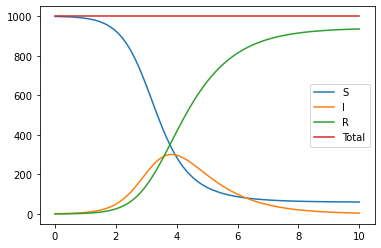

In [78]:
pr=ODEproblem("SIR")
tt=np.linspace(0,pr.T_fin, 100)
order = 5
tt,UU=decMPatankar(pr.prod_dest,tt,pr.u0, order-1 , order , "gaussLobatto")
plt.plot(tt,UU[0,:], label="S")
plt.plot(tt,UU[1,:], label="I")
plt.plot(tt,UU[2,:], label="R")
plt.plot(tt,np.sum(UU,0), label="Total")
plt.legend()

print("The minimum value reached is %e"%(np.amin(UU)))
print("The conservation error is %e"%(np.max(np.sum(UU,0)-np.sum(UU[:,0])) ))

The minimum value reached is 1.295711e-09
The conservation error is 1.065814e-14


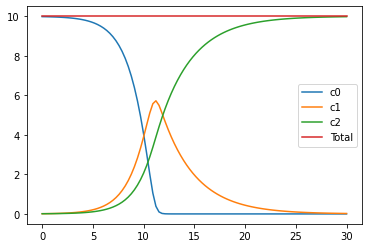

In [77]:
pr=ODEproblem("nonlinear_system3")
tt=np.linspace(0,pr.T_fin, 100)
order = 5
tt,UU=decMPatankar(pr.prod_dest,tt,pr.u0, order-1 , order , "equispaced")
plt.plot(tt,UU[0,:], label="c0")
plt.plot(tt,UU[1,:], label="c1")
plt.plot(tt,UU[2,:], label="c2")
plt.plot(tt,np.sum(UU,0), label="Total")
plt.legend()

print("The minimum value reached is %e"%(np.amin(UU)))
print("The conservation error is %e"%(np.max(np.sum(UU,0)-np.sum(UU[:,0])) ))

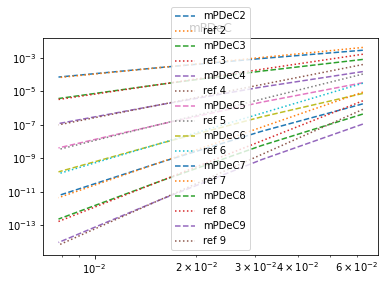

In [45]:
#Test convergence accuracy
def compute_integral_error(c,c_exact):  # c is dim x times
    times=np.shape(c)[1]
    error=0.
    for t in range(times):
        error = error + np.linalg.norm(c[:,t]-c_exact[:,t],2)**2.
    error = np.sqrt(error/times) 
    return error

pr = ODEproblem("linear_system2")

NN=4
dts=[pr.T_fin/2.0**k for k in range(4,NN+4)]
errorsmPDeC=np.zeros(len(dts))

for order in range(2,10):
    for k in range(NN):
        dt0=dts[k]
        tt=np.arange(0,pr.T_fin,dt0)
        u_exact=pr.exact_solution_times(pr.u0,tt)
        t2,U2=decMPatankar(pr.prod_dest, tt, pr.u0, order-1, order, "gaussLobatto")
        errorsmPDeC[k]=compute_integral_error(U2,u_exact)
 
    plt.loglog(dts,errorsmPDeC,"--",label="mPDeC%d"%(order))
    plt.loglog(dts,[dt**order*errorsmPDeC[2]/dts[2]**order for dt in dts],":",label="ref %d"%(order))


plt.title("mPDeC")
plt.legend()
#plt.savefig("convergence_RDeC.pdf")
plt.show()


The minimum value reached is 1.000000e-20
The conservation error is 8.371082e-14


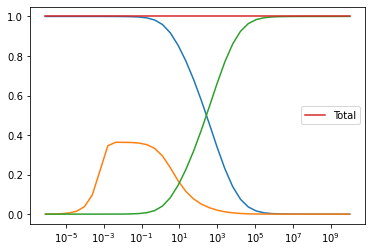

In [76]:
# Stiff problem: Robertson
pr = ODEproblem("Robertson")

Nt=40
order = 5  #2
tt = np.array([np.exp(k) for k in np.linspace(-14,np.log(pr.T_fin),Nt)])
tt,yy=decMPatankar(pr.prod_dest, tt, pr.u0, order-1,order,"gaussLobatto")

plt.semilogx(tt,yy[0,:])
plt.semilogx(tt,yy[1,:]*10**4)
plt.semilogx(tt,yy[2,:])

plt.semilogx(tt,np.sum(yy,0),label="Total")
plt.legend()

print("The minimum value reached is %e"%(np.amin(yy)))
print("The conservation error is %e"%(np.max(np.sum(yy,0)-np.sum(yy[:,0])) ))

## Strong Stability Preserving Runge Kutta schemes <a id='SSPRK'></a>

References:
1. S. Gottlieb, C.-W. Shu. Total Variation Diminishing Runge--Kutta 1996 [ResearchGate link](https://www.researchgate.net/publication/24288196_Total_Variation_Diminishing_Runge-Kutta_Schemes)
1. S. Gottlieb, C.-W. Shu, E. Tadmor. 2000 [Brown page](https://www.brown.edu/research/projects/scientific-computing/sites/brown.edu.research.projects.scientific-computing/files/uploads/Strong%20Stability-Preserving%20High-Order%20Time%20Discretization%20Methods.pdf)

We have seen that under certain conditions the **explicit Euler method** can preserve **stability** properties of some PDEs.
For example, in hyperbolic scalar problems

$$u_t+f(u)_x=0,$$

where $f\in \mathcal C^1$, we can prove that

$$ TV(u(t))\leq TV(u(t^0)),\qquad t>t^0, \qquad \text{with  } TV(u) = \sum_j |u_{j+1}-u_j|. $$

This property can be preserved in the **explicit Euler** time discretization with the incremental form spatial discretization  

$$
U^{n+1}_j=U^{n}_j +\Delta t \left [ C_{j+1/2}(U_{j+1}^{n}-U_{j}^{n})-D_{j-1/2}(U_{j}^{n}-U_{j-1}^{n}) \right]
$$

if $C_{j+1/2},D_{j+1/2}\geq 0$ for all $j$ and 

$$
\Delta t |C_{j+1/2}+D_{j+1/2}|\leq 1,\qquad \text{for all }j.
$$

We can say that under this restriction the explicit Euler method is **total variation diminishing** (TVD).

![Example TVD vs nonTVD](images/chapter6/exampleSSPvsNo.png)

These restrictions are the so-called CFL conditions, which are a restriction on the time step $\Delta t\leq \Delta t_{eE}$, which are the equivalent of the restrictions we observe on the time step for ODEs, where

$$
\Delta t \leq \frac{C}{L}, 
$$

with $C$ a constant and $L$ the Lipschitz continuity constant of $F$.

### Strong Stability Preserving (SSP) Runge Kutta methods
#### Explicit
Suppose that explicit Euler method is SSP (for example TVD, but not only) under the restriction

$$
\Delta t \leq \Delta t_{eE},
$$

how can we be sure that a RK method is as well SSP.

A general RK method is written as 

$$
\begin{cases}
y^{(1)}=y^n
y^{(k)}=y^n + \Delta t \sum_{j=1}^{k-1} a_{kj} F(y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(y^{(j)})
\end{cases}
$$

We can rewrite them in the SSP form

$$
\begin{cases}
y^{(0)} = y^n
y^{(k)}=\sum_{j=0}^{k-1} \alpha_{kj} y^{(j)} +\Delta t \beta_{kj} F(y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^{(S)},
\end{cases}
$$

where $\sum_{j=1}^S\alpha_{kj}=1$ for all $k$ for consistency. Suppose, moreover, that we can find nonnegative $\alpha_{kj}, \beta_{kj}\geq 0$. Then, we can find similar restrictions on this form to preserve the strong stability belonging to the explicit Euler method.

Indeed, each step can be rewritten as a **convex combination** of explicit Euler steps weighted by some coefficients

$$
y^{(k)}=\sum_{j=0}^{k-1} \alpha_{kj} \left( y^{(j)} +\Delta t \frac{\beta_{kj}}{\alpha_{kj} } F(y^{(j)})\right), \quad k=1,\dots, S,
$$

hence, if 

$$
\Delta t \frac{\beta_{kj}}{\alpha_{kj} } \leq \Delta t_{eE} \quad \forall j<k\leq S\\
\text{or } \Delta t \leq c \Delta t_{eE},  \qquad c:=\min_{j<k\leq S} \frac{\alpha_{kj} }{\beta_{kj}},
$$

then the scheme is **SSP**.

**Remark 1**: It is not always possible to find nonnegative $\beta_{kj}$, in those cases, one can proceed similarly, adding a stability hypothesis on the explicit Euler method for the backward in time problem ($\tilde F$). (Cost of computing the operators $\tilde F$ and $F$ rises as well as storing memory).
If you can, avoid the negative coefficient.

**Remark 2**: Multistep method can be rendered into SSP version with analogous arguments.

**Remark 3**: the goal is to optimize $c$ by finding the coefficients $\alpha,\beta$ keeping the order of accuracy required.
This can be done starting from a known RK method where the coefficients are half of the SSPRK method, hence there's a lot to optimize.

**Example**
Consider the RK22 method

$$
u^{(1)}=u^n\\
u^{(2)}=u^{(1)} +\Delta t F(u^{(1)})\\
u^{n+1}=u^n+\frac{1}{2} \left(F(u^{(1)}) + F(u^{(2)}) \right)
$$

and try to write it into a SSPRK method

$$
u^{(0)}=u^n\\
u^{(1)} = u^{(0)} +\Delta t F(u^{(0)})\\
u^{(2)} = \alpha_{2,0} u^{(0)} +\alpha_{2,1} u^{(1)} + \Delta t \left( \beta_{2,0} F(u^{(0)}) + \beta_{2,1} F(u^{(1)})\right) \\
u^{n+1}=u^{(2)}
$$

which, expanding becomes

$$
u^{n+1}= u^{(0)}  + \Delta t \left( \left( \beta_{2,0}+\alpha_{2,1}\right)  F(u^{(0)}) + \beta_{2,1} F(u^{(1)})\right),
$$

which, if we want to make the two method coincide, leads to the system

$$
\begin{cases}
\alpha_{2,0}+\alpha_{2,1}=1\\
\beta_{2,0}+\alpha_{2,1} =\frac{1}{2}\\
\beta_{2,1} = \frac{1}{2}.
\end{cases}
$$

#### Theorem 1
An $S$-stages, $S$-order SSPRK method has at most CFL $c\leq 1$.

#### Theorem 2
For **linear problems** ($F(y)=My$), there exist $S$-stages, $S$-order SSPRK methods with CFL $c=1$. (For nonlinear problems they are not order $S$).

#### Theorem 3
Optimal 2nd order 2 stages SSPRK with CFL $c=1$ is 

$$
u^{(1)} = u^n +\Delta t F(u^n)\\
u^{n+1} = \frac{1}{2} u^n  + \frac{1}{2} u^{(1)} +\frac{1}{2} \Delta t F(u^{(1)}).
$$

Optimal 3nd order 3 stages SSPRK with CFL $c=1$ is 

$$
u^{(1)} = u^n +\Delta t F(u^n)\\
u^{(2)} = \frac{3}{4} u^n  + \frac{1}{4} u^{(1)} +\frac{1}{4} \Delta t F(u^{(1)})\\
u^{n+1} = \frac{1}{3} u^n  + \frac{2}{3} u^{(2)} +\frac{2}{3} \Delta t F(u^{(2)}).
$$

There is no 4th order 4 stages with positive coefficients SSPRK.

In [91]:
A=np.array([[0,0],[1,0]])
b=np.array([0.5,0.5])
rk2 = rk.ExplicitRungeKuttaMethod(A,b)

A=np.array([[0]])
b=np.array([1])
rk1 = rk.ExplicitRungeKuttaMethod(A,b)

print(rk2.optimal_shu_osher_form())

A=np.array([[0,0],[0.5,0]])
b=np.array([0,1])
rk2 = rk.ExplicitRungeKuttaMethod(A,b)

print(rk2.optimal_shu_osher_form())

(array([[0, 0, 0],
       [1.00000000000000, 0, 0],
       [0.500000000034561, 0.499999999965439, 0]], dtype=object), array([[0, 0, 0],
       [1.00000000000000, 0, 0],
       [3.45607986673713e-11, 0.500000000000000, 0]], dtype=object))
(array([[0, 0, 0],
       [1.00000000000000, 0, 0],
       [1.00000000000000, 0, 0]], dtype=object), array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=object))


#### Implicit RK
It is not so trivial to prove properties for implicit schemes, as a nonlinear solver is involved. When restricting to specific cases, it is possible to recast some results.

##### Theorem 1 (Harten) 
Implicit Euler for incremental finite difference form is **unconditionally** TVD (SSP) (for any $\Delta t$).

*Proof in Chapter 2*

##### Theorem 2
It does not exists an implicit RK scheme of the form

$$
u^{(0)}=u^n\\
u^{(k)}=\sum_{j=0}^{k-1}\alpha_{kj}u^{(j)}+\Delta t \beta_k F(u^{(k)}),\qquad \alpha_{kj}\geq 0, \qquad k=1,\dots, S,\\
u^{n+1}=u^{(S)},
$$

with order $\geq 2$ that is also unconditionally stable.

### SSP multistep methods
For multistep methods we have analogous results, there are a series of optimal values for the coefficients of explicit SSP multistep methods, while there exists no high order unconditionally SSP implicit multistep method.

A collection of optimal values of SSPRK can be found at [Gottlieb's page at Brown University](http://www.cfm.brown.edu/people/sg/ssp.html) 

More optimal values in [Ruuth Spiteri 2006](https://epubs.siam.org/doi/abs/10.1137/S0036142901389025?journalCode=sjnaam)

SSPRK 33
The optimal 3-stage, 3rd order SSP Runge-Kutta method
     |                |
 1   | 1              | 1
 1/2 | 3/4  1/4       |      1/4
_____|________________|________________
     | 1/3       2/3  |           2/3
SSPRK 33
The optimal 3-stage, 3rd order SSP Runge-Kutta method
 0   |
 1   | 1
 1/2 | 1/4  1/4
_____|_______________
     | 1/6  1/6  2/3
     | 0.291 0.291 0.417


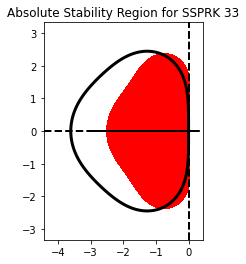

In [100]:
#Few examples of order 3
ssprk33=rk.loadRKM("SSP33")
ssprk33.print_shu_osher()
print(ssprk33)
ssprk33.plot_stability_region()
plt.show()

SSPRK 33
The optimal 3-stage, 3rd order SSP Runge-Kutta method
     |                |
 1   | 1              | 1
 1/2 | 3/4  1/4       |      1/4
_____|________________|________________
     | 1/3       2/3  |           2/3
SSPRK 33
The optimal 3-stage, 3rd order SSP Runge-Kutta method
 0   |
 1   | 1
 1/2 | 1/4  1/4
_____|_______________
     | 1/6  1/6  2/3
     | 0.291 0.291 0.417


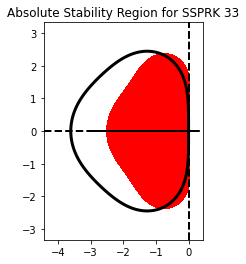

SSPRK(4,3)
The optimal four-stage, third order SSP Runge-Kutta method
     |                     |
 1/2 |                     | 1/2
 1   |                     | 1/2  1/2
 1/2 |                     | 1/6  1/6  1/6
_____|_____________________|_____________________
     |                     | 1/6  1/6  1/6  1/2
SSPRK(4,3)
The optimal four-stage, third order SSP Runge-Kutta method
 0   |
 1/2 | 1/2
 1   | 1/2  1/2
 1/2 | 1/6  1/6  1/6
_____|____________________
     | 1/6  1/6  1/6  1/2
     | 1/4  1/4  1/4  1/4


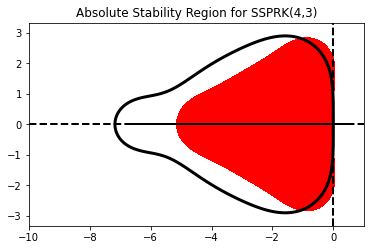

SSP 53
From Ruuth-Spiteri paper
       |                                    |
 0.377 |                                    | 0.377
 0.755 |                                    | 0.377  0.377
 0.491 |                                    | 0.164  0.164  0.164
 0.788 |                                    | 0.149  0.148  0.148  0.342
_______|____________________________________|____________________________________
       |                                    | 0.197  0.118  0.117  0.270  0.298
SSP 53
From Ruuth-Spiteri paper
 0.000 |
 0.377 | 0.377
 0.755 | 0.377  0.377
 0.491 | 0.164  0.164  0.164
 0.788 | 0.149  0.148  0.148  0.342
_______|___________________________________
       | 0.197  0.118  0.117  0.270  0.298


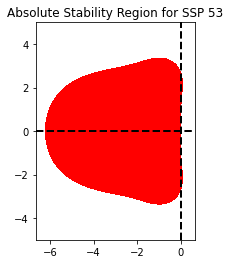

SSP 63
From Ruuth 2006 paper
       |                                           |
 0.284 | 1.000                                     | 0.284
 0.568 |        1.000                              |        0.284
 0.853 |               1.000                       |               0.284
 0.511 | 0.477  0.099         0.425                |                      0.121
 0.795 |                             1.000         |                             0.284
_______|___________________________________________|___________________________________________
       |               0.155                0.845  |                                    0.240
SSP 63
From Ruuth 2006 paper
 0     |
 0.284 | 0.284
 0.568 | 0.284  0.284
 0.853 | 0.284  0.284  0.284
 0.511 | 0.149  0.121  0.121  0.121
 0.795 | 0.149  0.121  0.121  0.121  0.284
_______|__________________________________________
       | 0.170  0.146  0.102  0.102  0.240  0.240


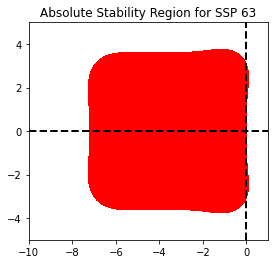

In [103]:
for method in ["SSP33","SSP43","SSP53","SSP63"]:
    ssprk=rk.loadRKM(method)
    ssprk.print_shu_osher()
    print(ssprk)
    ssprk.plot_stability_region()
    plt.show()


SSPRK(10,4)
The optimal ten-stage, fourth order SSP Runge-Kutta method
      |                                                             |
 1/6  | 1                                                           | 1/6
 1/3  |       1                                                     |       1/6
 1/2  |             1                                               |             1/6
 2/3  |                   1                                         |                   1/6
 1/3  |                         2/5                                 |                         1/15
 1/2  |                               1                             |                               1/6
 2/3  |                                     1                       |                                     1/6
 5/6  |                                           1                 |                                           1/6
 1    |                                                 1           |                             

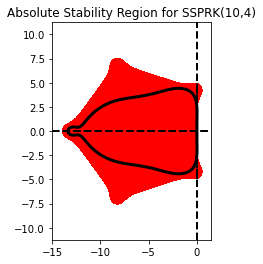

In [99]:
#Few examples
ssprk104=rk.loadRKM("SSP104")
ssprk104.print_shu_osher()
print(ssprk104)
ssprk104.plot_stability_region()
plt.show()

#### Exercise
Test few methods with your favorite problems.